In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from random import randrange
from random import seed
from csv import reader

In [6]:
data = pd.read_csv("house-votes-84.csv")
data['ClassName'] = data['ClassName'].apply(lambda x: 1 if x == 'democrat' else 0)

In [7]:
data

,ClassName,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
2,1,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,2,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,2,2,2,2,0,1,1,1,0,1


In [4]:
feature_cols = ['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue',
                'crime', 'duty-free-exports', 'export-administration-act-south-africa']

X = data[feature_cols] # Features
y = data.ClassName # Target variable

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=25)

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9694656488549618


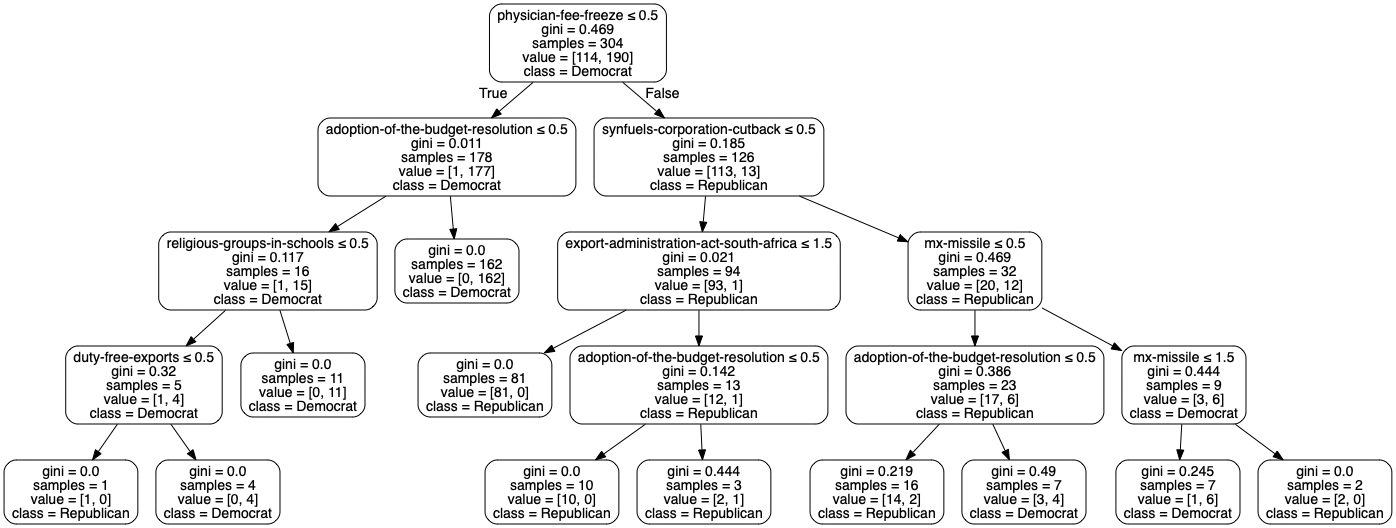

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=False, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Republican','Democrat'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('election.png')
Image(graph.create_png())

In [8]:
def gini(data):
    t = len(data)
    p = data.groupby("ClassName").size()/t
    return 1 - sum(p**2)
gini(data)

0.47410225921522

In [9]:
def entropy(data):
    t = len(data)
    p = data.groupby("ClassName").size()/t
    return -sum(p*np.log2(p.values))
entropy(data)

0.9623080486960709

In [24]:
#  For the current node N
    # – If all training examples classified correctly then
        # ∗ Stop
    # – Otherwise
        # ∗ Compute the splitting criterion for each attribute
        # ∗ Split the current node according to the attribute which maximizes the splitting criterion
        # ∗ Recursively apply to each newly created child node Ni

# Load a CSV file and format it correclty
def load_csv(filename):
    file = open(filename, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset
 
# Convert string column to float
def str_column_to_float(df, column):
    for row in df:
        row[column] = float(row[column].strip())
        
# Split a dataset into k folds
def cross_val(df, n_folds):
    df_split = list()
    df_copy = list(df)
    fold_size = int(len(df) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(df_copy))
            fold.append(df_copy.pop(index))
        df_split.append(fold)
    return df_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    corr = 0 #initiates correct predictions
    for i in range(len(actual)):
        if actual[i] == predicted[i]: #if they are equal then it is a correct prediction
            corr += 1
    return corr / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_tree(df, algorithm, n_folds, *args):
    folds = cross_val(df, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, df):
    left, right = list(), list()
    for row in df:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset it morphs the impurity and gini calculation together
def impurity(groups, prop):
    # count all samples at split point
    n_samples = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in prop:
            p = [row[-1] for row in group].count(class_val) / size
            score += p**2
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_samples)
    return gini
 
# Select the best split point for a dataset so that the build tree function can choose a root node
def best_split(df):
    class_val = list(set(row[-1] for row in df))
    best_index, best_value, best_score, best_groups = 999, 999, 999, None
    for index in range(len(df[0])-1):
        for row in df:
            groups = test_split(index, row[index], df)
            gini = impurity(groups, class_val) #takes the impurity scored calculated
            if gini < best_score: # if the gini index is less than best score then it updates the best values
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    return {'index':best_index, 'value':best_value, 'groups':best_groups}
 
# Create leaf node
def leaf(group):
    results = [row[-1] for row in group] #takes the given results and makes it a group
    return max(set(results), key=results.count)
 
# Splits the node into another chile or makes it into a leaf
def split_node(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split if a split does not need to happen and creates a leaf
    if not left or not right:
        node['left'] = node['right'] = leaf(left + right)
        return
    # check for max depth to make sure the tree does not go beyond it
    if depth >= max_depth:
        node['left'], node['right'] = leaf(left), leaf(right)
        return
    # process left child and adding it to a leaf or continues to split it
    if len(left) <= min_size:
        node['left'] = leaf(left)
    else:
        node['left'] = best_split(left)
        split_node(node['left'], max_depth, min_size, depth+1)
    # process right child and adding it to a leaf or continues to split it
    if len(right) <= min_size:
        node['right'] = leaf(right)
    else:
        node['right'] = best_split(right)
        split_node(node['right'], max_depth, min_size, depth+1)

#builds tree based on the given training data, a max depth of the tree and a minimum size it must be
def make_tree(train, max_depth, min_size):
    root_node = best_split(train) #root node is the best split based on the impurity calculation given
    split_node(root_node, max_depth, min_size, 1) #then splits that node recursivley to create the tree
    return root_node
 
# Make a prediction with a decision tree
def predict_val(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict_val(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict_val(node['right'], row)
        else:
            return node['right']
        
# Classification and Regression Tree Algorithm
def tree_classifier(train, test, max_depth, min_size): #takes the train and test data given
    tree = make_tree(train, max_depth, min_size) #creates tree based on these parameters
    predictions = list() #takes predicitons and puts them in a list
    for row in test: #for every row in the test make a prediciton and add it to the prediciton list
        prediction = predict_val(tree, row)
        predictions.append(prediction)
    return(predictions)

seed(1)
# load and prepare data
filename = 'Election_Data.csv' #had to change some things but it is the same as original csv
df = load_csv(filename)

# convert string attributes to integers
for i in range(len(df[0])):
    str_column_to_float(df, i)

# evaluating the decision tree algorithm
n_folds = 5 #how many times I want to evaulte the algorithm with differnet training sets
max_depth = 4
min_size = 20
scores = evaluate_tree(df, tree_classifier, n_folds, max_depth, min_size)
print('K-Fold Scores: %s' % scores)
print('Mean Accuracy of Scores: %.3f%%' % (sum(scores)/float(len(scores))))

K-Fold Scores: [62.06896551724138, 71.26436781609196, 56.32183908045977, 64.36781609195403, 57.47126436781609]
Mean Accuracy of Scores: 62.299%


In [23]:
error_rate = 100 - (sum(scores)/float(len(scores)))
print('Error Rate: %.3f%%' % error_rate)

Error Rate: 37.701%


Obviously the error rate of my first time makig a decision tree algortihm is much worse than the sklearn library decision tree classifier. However, it was nice to read in depth on creating this algorithm and I think I really understand it now!